#Code to Search Twitter for pre-determined search term

In [1]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.api import API
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#http://blog.impiyush.me/2015/03/data-analysis-using-twitter-api-and.html
#https://github.com/manugarri/tweets_map/blob/master/2.%20Parse%20the%20tweet%20file.ipynb

# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')

In [2]:
consumer_key = 'geVsNXcQTGerWBsBfKMw2YtBk'
consumer_secret = 'KV7PeGQdwYk5fcyaGNcmQHeuEpxDG8Zrz4Cf8miyuRmSHI2cTB'
access_token = '725803508-bokr4EtshvF6lS69OYHdRVPkXxk3GTeRH5xbdpjv'
access_token_secret = '41rGSpQBC4W0BioWHcNWhIjCM76jG5T2xVVi6xKHtxaBQ'

key = tweepy.OAuthHandler(consumer_key, consumer_secret)
key.set_access_token(access_token, access_token_secret)

In [3]:
api = tweepy.API(key)

query = 'Irish Rugby'
max_tweets = 100000

In [4]:
searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

In [5]:
len(searched_tweets)

18000

#Convert tweets in useable dataframe

In [6]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(searched_tweets)

In [7]:
DataSet.tail(1)


,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
17999,653272239106752512,Rugby World Cup 2015: France 9-24 Ireland - Ir...,0,0,dlvr.it,2015-10-11 18:13:33,1250845256,InlandTradez,InlandTradez,2013-03-08 05:39:07,"Poker = Life, Full-Time Online grinder.",40,1004,,Pacific Time (US & Canada)


In [8]:
df=DataSet

##Tweets per minute

In [9]:
df['tweetCreated'] = pd.to_datetime(pd.Series(df['tweetCreated']))
df.set_index('tweetCreated', drop=False, inplace=True)
df.index = df.index.tz_localize('GMT').tz_convert('EST')
#df.index = df.index - Date_Offset(hours = 12)
df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-10-19 09:34:14-05:00, ..., 2015-10-11 13:13:33-05:00]
Length: 18000, Freq: None, Timezone: EST

In [10]:
#df["tweetCreated"] = pd.to_datetime(df["tweetCreated"], unit='s')
#df.set_index(['tweetCreated'], inplace=True)


In [11]:
flyers1m = df['tweetCreated'].resample('1t', how='count')
flyers1m.head()

tweetCreated
2015-10-11 13:13:00-05:00    17
2015-10-11 13:14:00-05:00    19
2015-10-11 13:15:00-05:00    15
2015-10-11 13:16:00-05:00     8
2015-10-11 13:17:00-05:00     8
Freq: T, Name: tweetCreated, dtype: int64

#####Avg. Tweets per minute

In [12]:
avg = flyers1m.mean()
avg

1.5926384710670678

In [14]:
import vincent
vincent.core.initialize_notebook()
area = vincent.Area(flyers1m)
area.colors(brew='Spectral')
area.display()

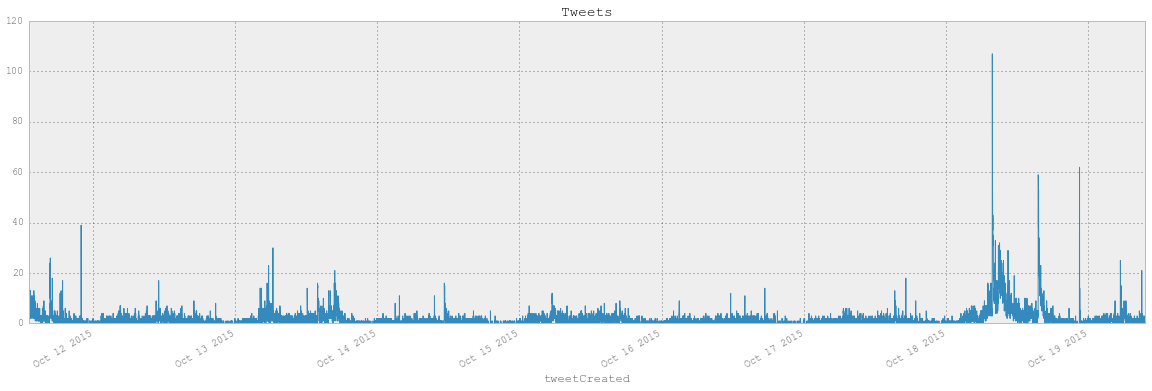

In [20]:
flyers1m.plot(title='Tweets', figsize=(20,6))

#Tweet Timezone

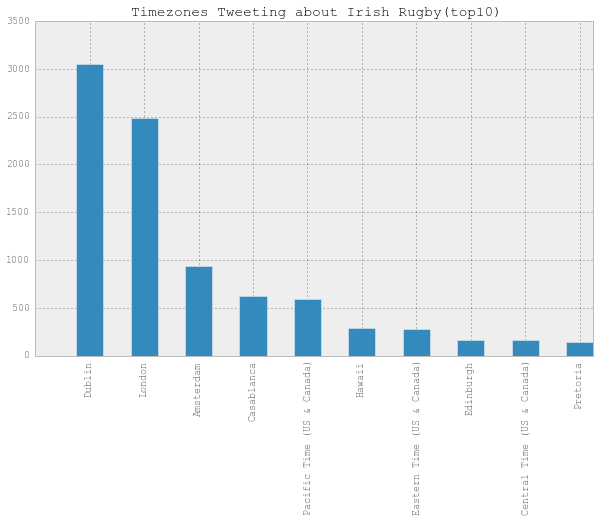

In [15]:
df.userTimezone.value_counts()[:10].plot(kind='bar', figsize=(10,6),title='Timezones Tweeting about Irish Rugby(top10)')


#Tweet Device Source

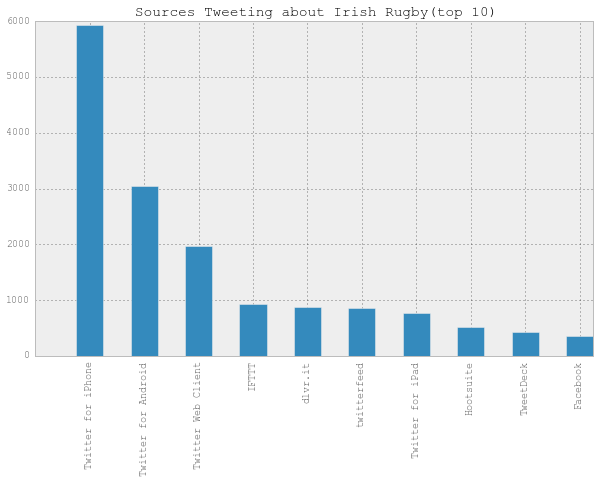

In [16]:
df.tweetSource.value_counts()[:10].plot(kind='bar', figsize=(10,6),title='Sources Tweeting about Irish Rugby(top 10)')

#Tweet User Location

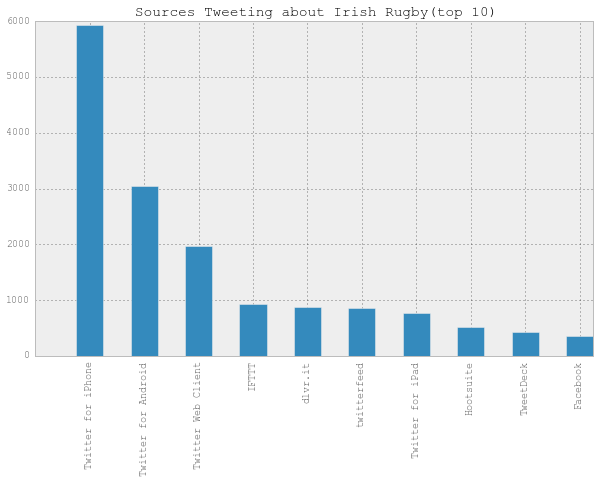

In [17]:
df.tweetSource.value_counts()[:10].plot(kind='bar', figsize=(10,6),title='Sources Tweeting about Irish Rugby(top 10)')

#NLTK